In [35]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import matplotlib.style as style
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
style.use('bmh') ## style for charts

In [4]:
## from: https://www2.1010data.com/documentationcenter/prod/Tutorials/MachineLearningExamples/CensusIncomeDataSet.html
header_names = [
    'age',
    'class_worker',
    'det_ind_code',
    'det_occ_code',
    'education',
    'wage_per_hour',
    'hs_college',
    'marital_stat',
    'major_ind_code',
    'major_occ_code',
    'race',
    'hisp_origin',
    'sex',
    'union_member',
    'unemp_reason',
    'full_or_part_emp',
    'capital_gains',
    'capital_losses',
    'stock_dividends',
    'tax_filer_stat',
    'region_prev_res',
    'state_prev_res',
    'det_hh_fam_stat',
    'det_hh_summ',
    'instance_weight', ## this field is not used as a feature
    'mig_chg_msa',
    'mig_chg_reg',
    'mig_move_reg',
    'mig_same',
    'mig_prev_sunbelt',
    'num_emp',
    'fam_under_18',
    'country_father',
    'country_mother',
    'country_self',
    'citizenship',
    'own_or_self',
    'vet_question',
    'vet_benefits',
    'weeks_worked',
    'year',
    'income_50k',
]

In [5]:
df = pd.read_csv('./input/census-income.data.csv', header=None, names=header_names)
df_test = pd.read_csv('./input/census-income.test.csv', header=None, names=header_names)
df = pd.concat([df,df_test]) ## the test file is also labelled so they can be merged
df.drop(columns=['instance_weight']) ## not used for our analysis
df.shape

(299285, 42)

In [22]:
categorical_features = [
    'class_worker',
    'det_ind_code',
    'det_occ_code',
    'education',
    'hs_college',
    'marital_stat',
    'major_ind_code',
    'major_occ_code',
    'race',
    'hisp_origin',
    'sex',
    'union_member',
    'unemp_reason',
    'full_or_part_emp',
    'tax_filer_stat',
    'region_prev_res',
    'state_prev_res',
    'det_hh_fam_stat',
    'det_hh_summ',
    'mig_chg_msa',
    'mig_chg_reg',
    'mig_move_reg',
    'mig_same',
    'mig_prev_sunbelt',
    'fam_under_18',
    'country_father',
    'country_mother',
    'country_self',
    'citizenship',
    'own_or_self',
    'vet_question',
    'vet_benefits',
    'year',
]
continuous_features = [
    'age', 
    'wage_per_hour',
    'capital_gains',
    'capital_losses',
    'stock_dividends',
    'num_emp',
    'weeks_worked',
  ]
df[categorical_features] = df[categorical_features].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299285 entries, 0 to 99761
Data columns (total 42 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   age               299285 non-null  int64   
 1   class_worker      299285 non-null  category
 2   det_ind_code      299285 non-null  category
 3   det_occ_code      299285 non-null  category
 4   education         299285 non-null  category
 5   wage_per_hour     299285 non-null  int64   
 6   hs_college        299285 non-null  category
 7   marital_stat      299285 non-null  category
 8   major_ind_code    299285 non-null  category
 9   major_occ_code    299285 non-null  category
 10  race              299285 non-null  category
 11  hisp_origin       299285 non-null  category
 12  sex               299285 non-null  category
 13  union_member      299285 non-null  category
 14  unemp_reason      299285 non-null  category
 15  full_or_part_emp  299285 non-null  category
 16  cap

In [24]:
df.describe()

,age,wage_per_hour,capital_gains,capital_losses,stock_dividends,instance_weight,num_emp,weeks_worked
count,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000,299285.000000
mean,34.538998,55.105027,431.742176,36.849010,195.851259,1740.101125,1.956172,23.178375
std,22.318468,273.340729,4670.768536,269.789771,1937.847082,994.144299,2.364857,24.404016
min,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,1060.490000,0.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,1617.110000,1.000000,8.000000
75%,50.000000,0.000000,0.000000,0.000000,0.000000,2188.110000,4.000000,52.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,52.000000


In [25]:
df.describe(include = 'category')

,class_worker,det_ind_code,det_occ_code,education,hs_college,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,...,mig_prev_sunbelt,fam_under_18,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,year
count,299285,299285,299285,299285,299285,299285,299285,299285,299285,299285,...,299285,299285,299285,299285,299285,299285,299285,299285,299285,299285
unique,9,52,47,17,3,7,24,15,5,10,...,4,5,43,43,43,5,3,3,3,2
top,Not in universe,0,0,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,...,?,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,94
freq,150324,150967,150967,72554,280367,129628,150967,150967,250978,257830,...,149642,216626,238531,240492,265342,265347,270860,296274,225427,149643


In [6]:
def categorical_explanitory_binary_response_chart(chart_df, field, target):
    field_count  = chart_df[field].value_counts()
    field_count_df = field_count.to_frame()
    field_count_df.columns = ['count']
    
    field_target_pct = pd.crosstab(chart_df[field], chart_df[target], normalize='index') * 100
    field_target_pct = field_target_pct.reset_index()
    field_target_pct = field_target_pct.iloc[:, :-1] ## arbitarily drop one of the two complementing percetages
    
    field_target_data = field_target_pct.merge(field_count_df, right_index=True, left_on=field).sort_values('count', ascending=False)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlabel(field)
    ax = sns.barplot(field_target_data[field], field_target_data['count'], alpha=0.8)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_ylabel('count (bars)')
    ax2 = ax.twinx()
    ax2 = sns.pointplot(x=field_target_data[field], y=field_target_data.iloc[:, -2], color='black', legend=False)
    ax2.set_ylabel('% {t} (line)'.format(t = target))
    plt.show()
    

<Figure size 720x14256 with 0 Axes>

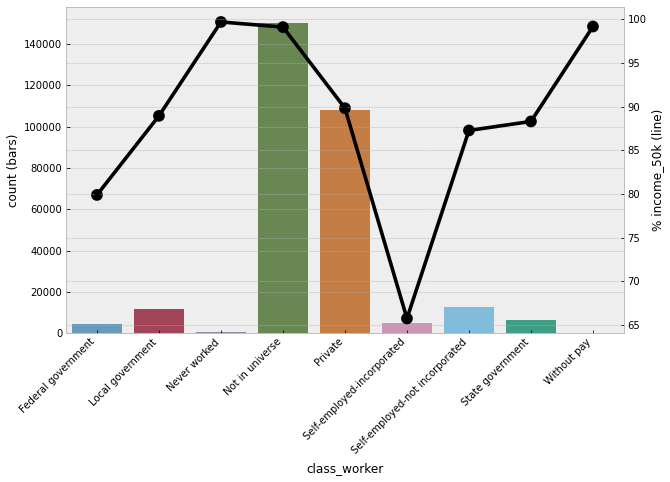

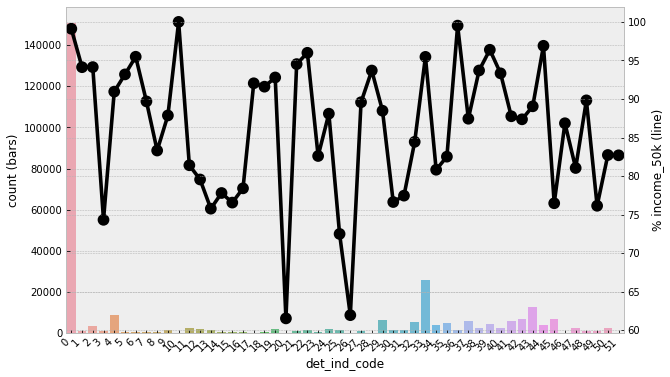

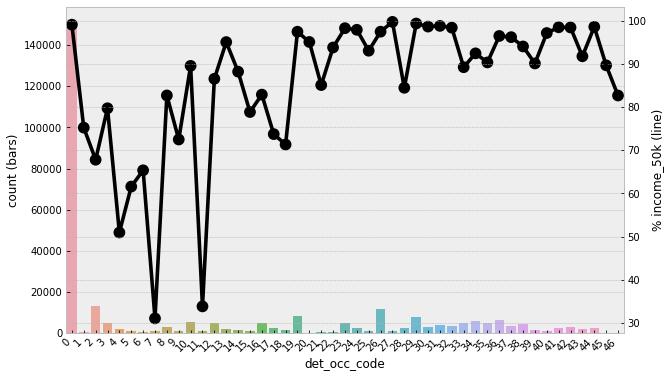

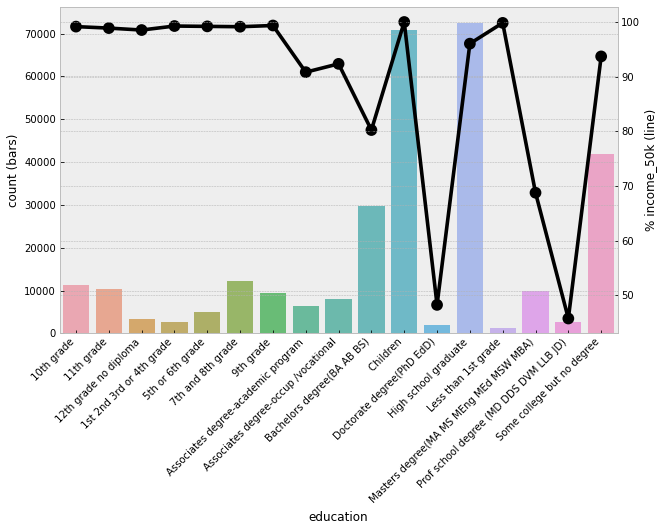

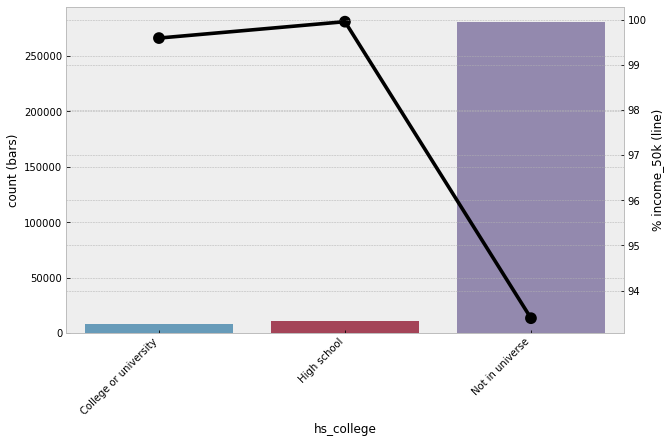

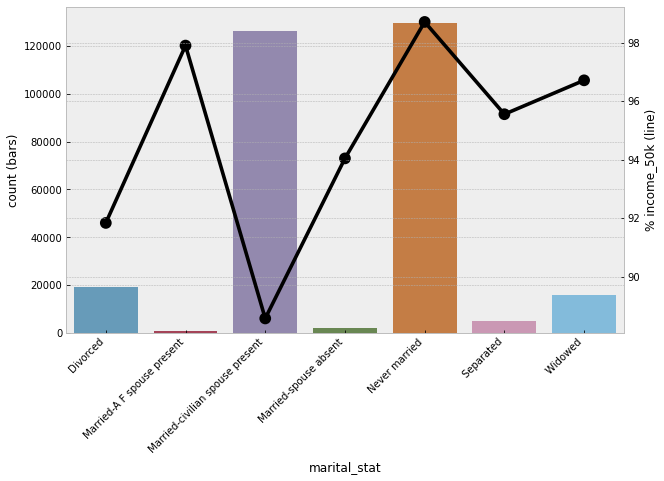

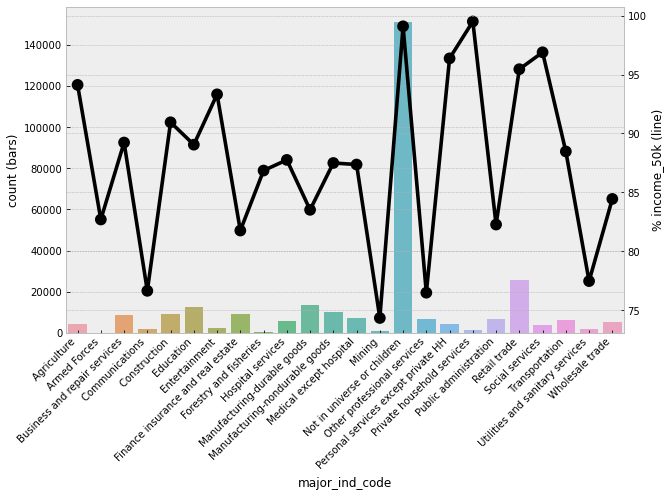

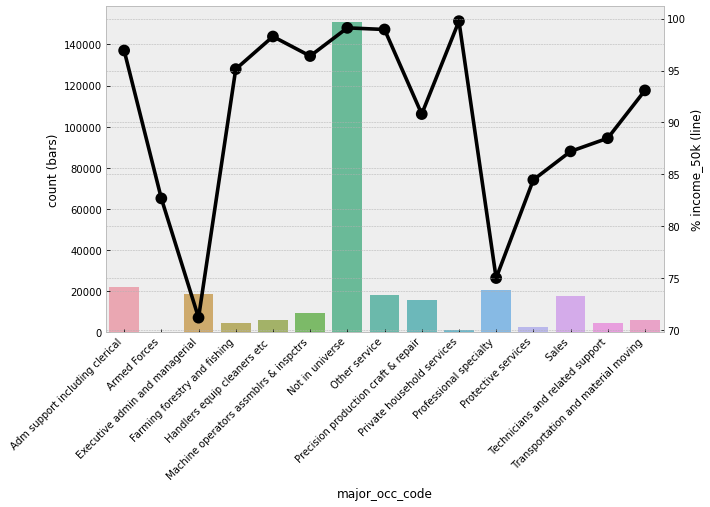

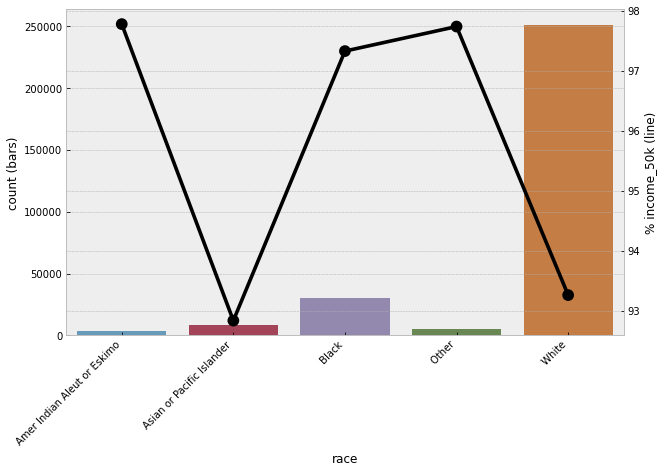

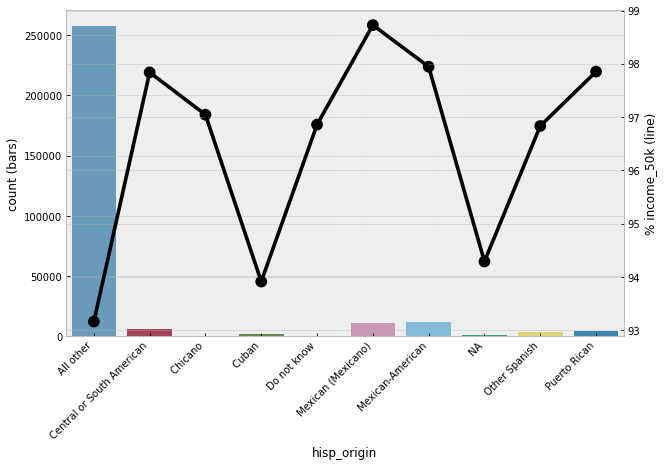

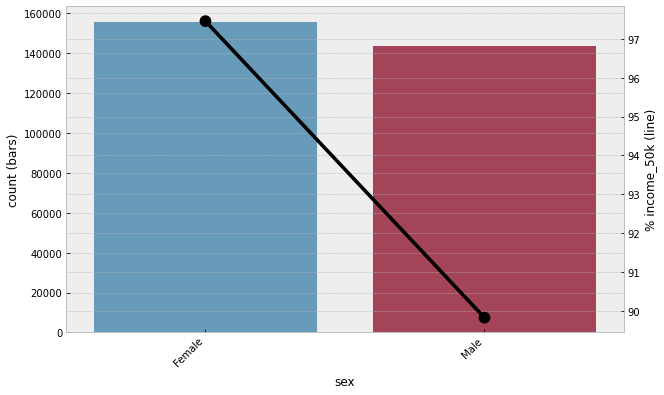

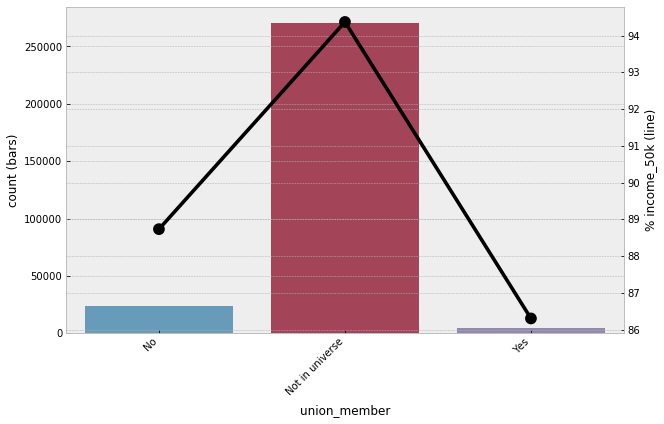

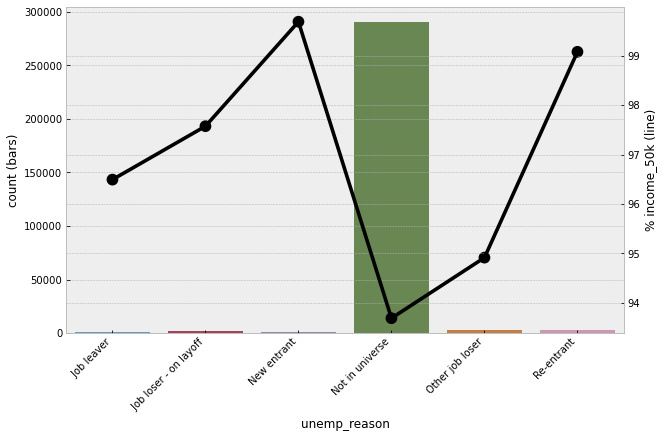

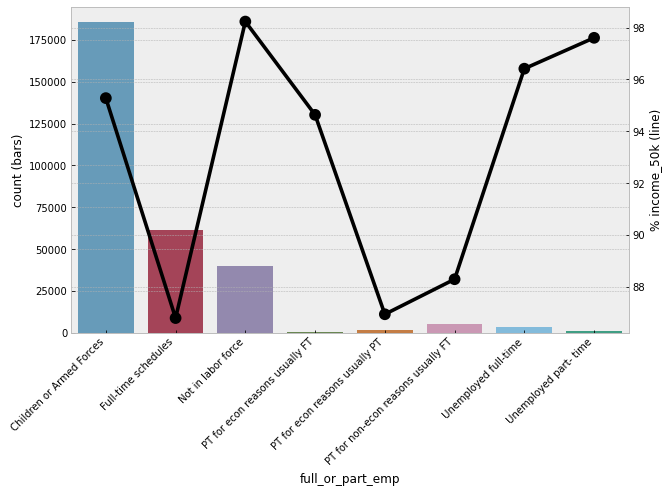

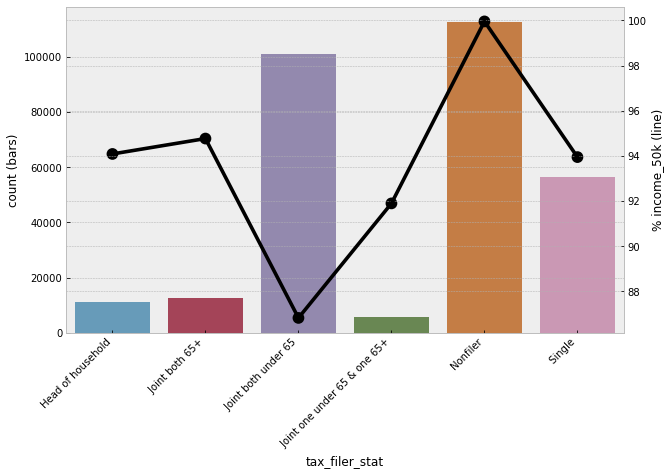

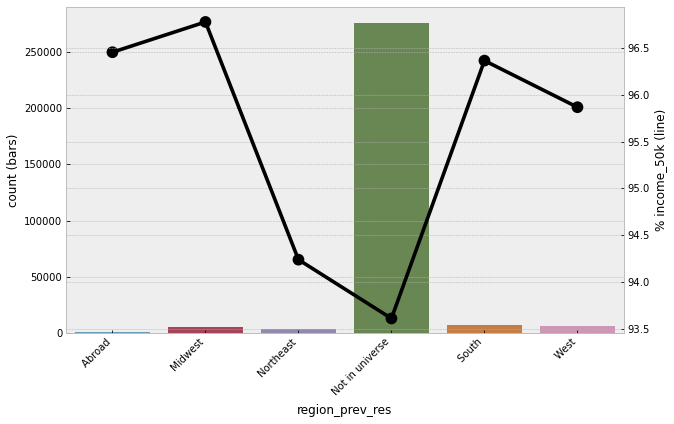

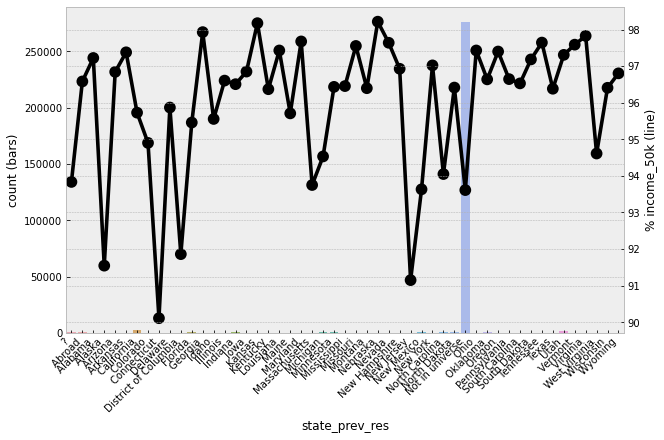

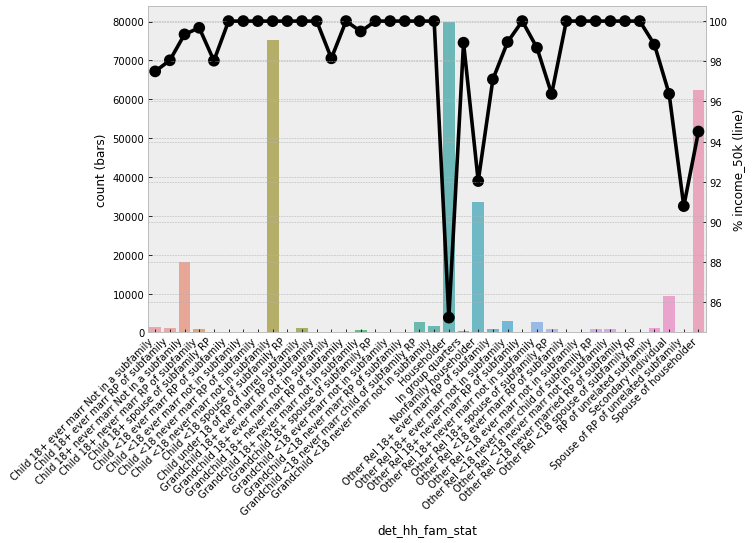

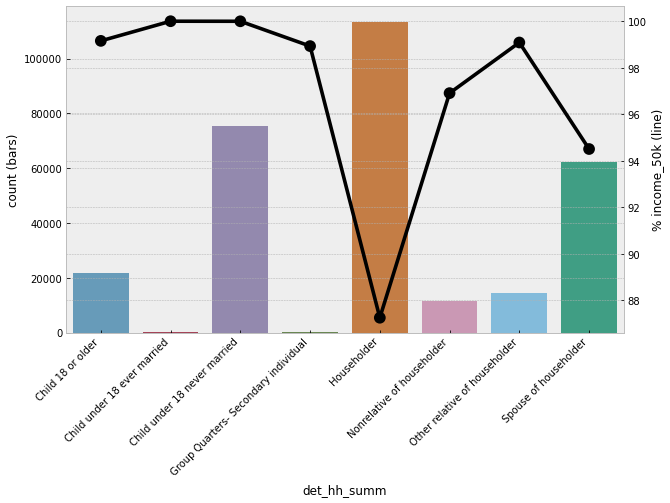

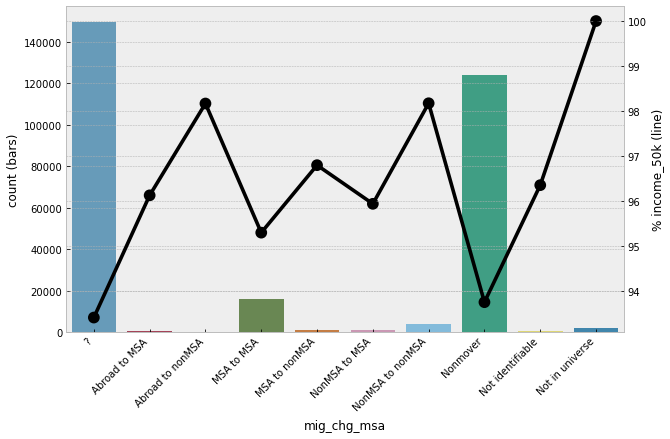

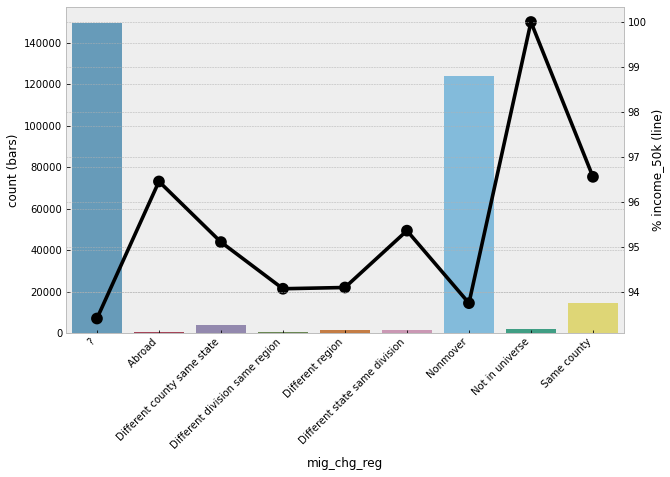

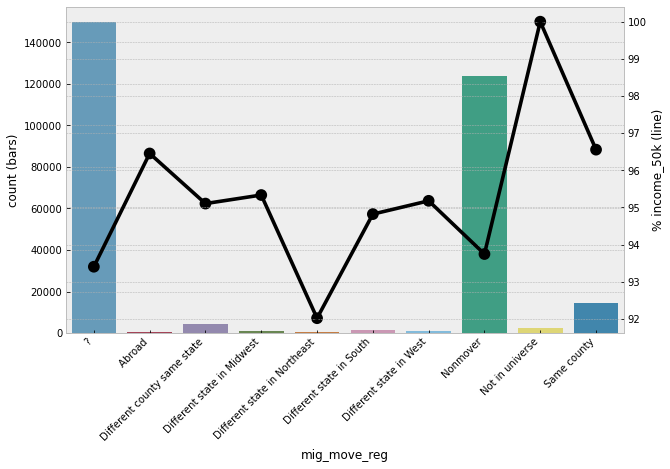

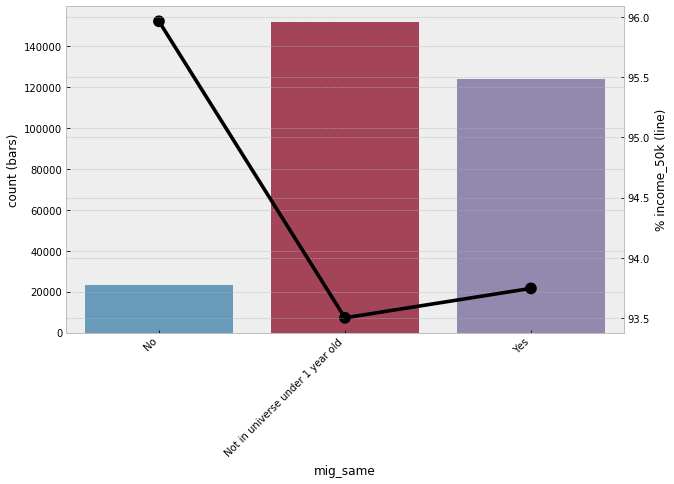

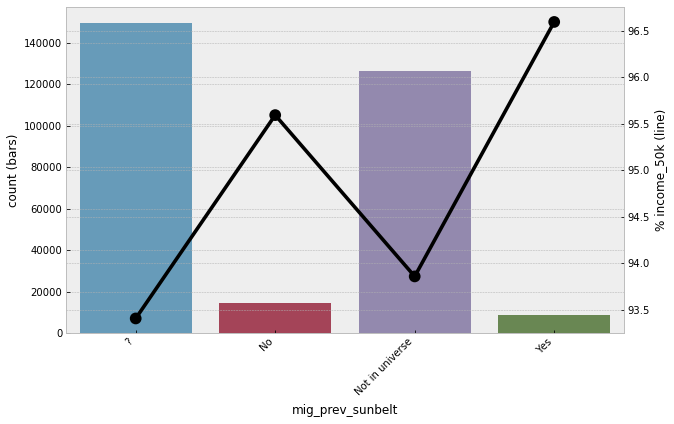

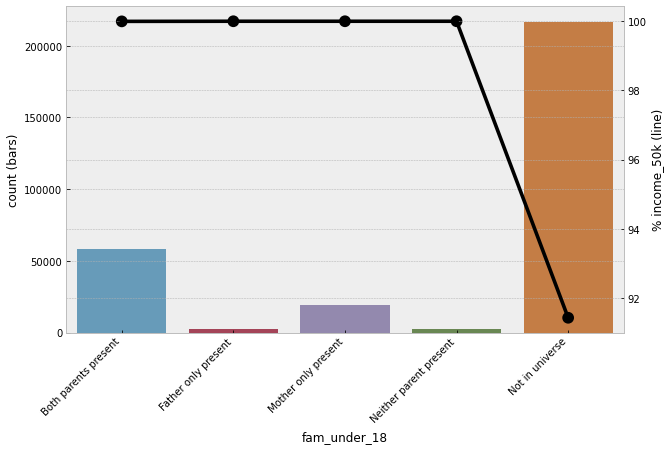

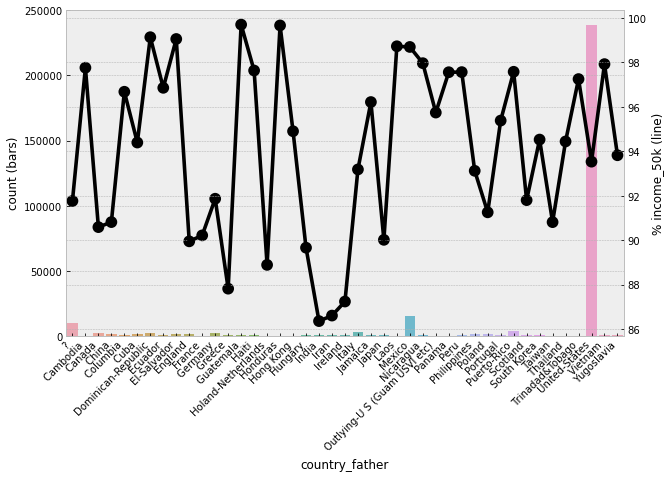

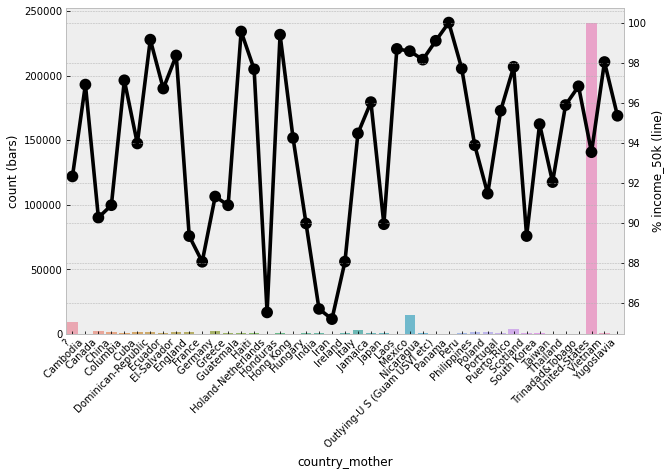

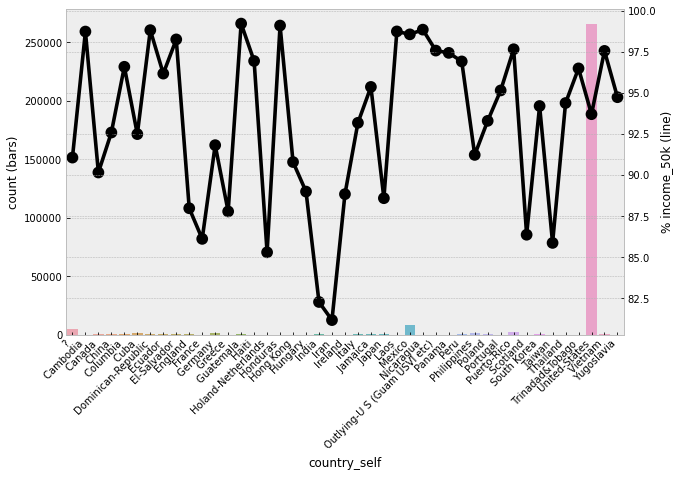

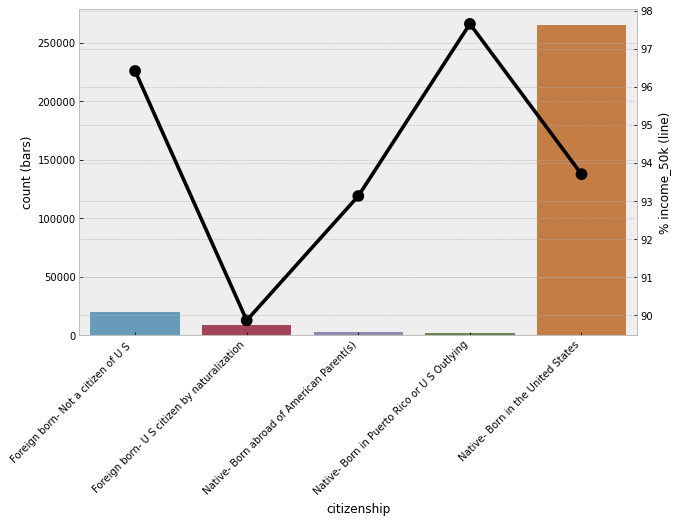

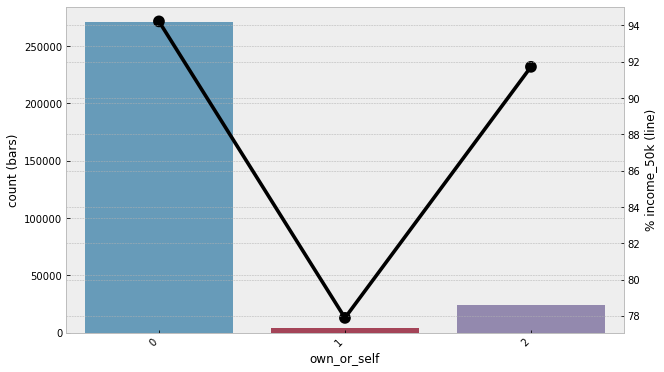

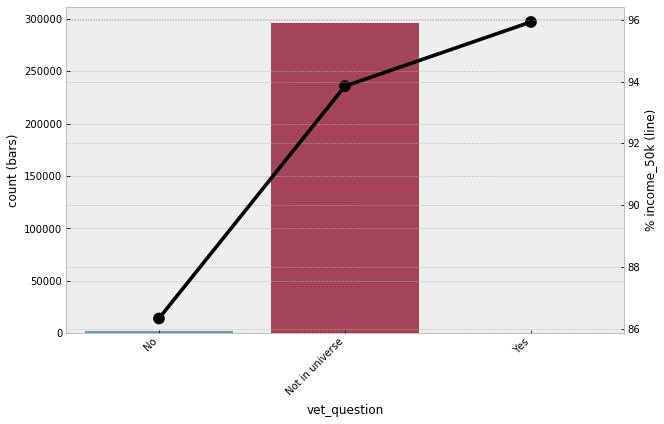

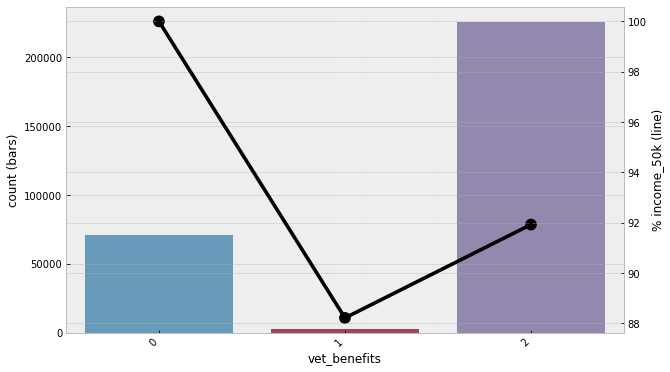

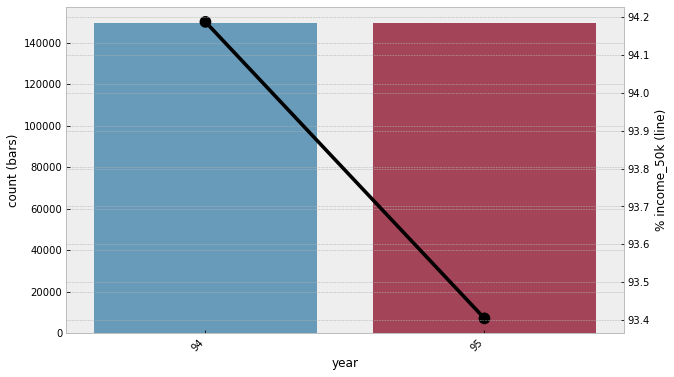

In [23]:
## just plot all the categoricals to explore and do one at a time later
feat_count = len(categorical_features)
plt.figure(figsize=(10, 6*feat_count))
for feat in categorical_features:
    categorical_explanitory_binary_response_chart(df, feat, 'income_50k')

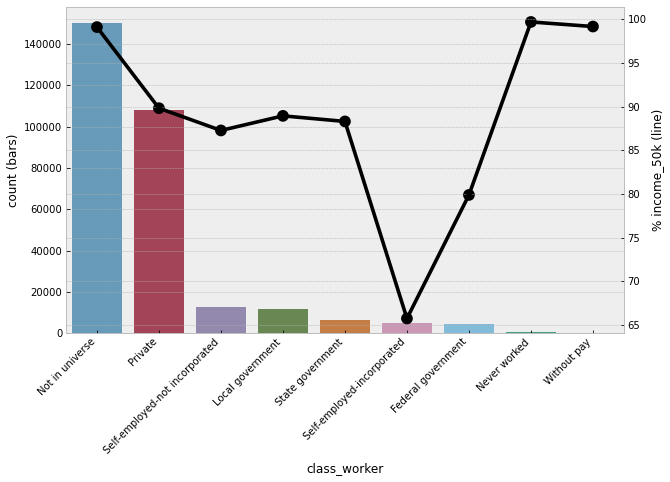

In [7]:
categorical_explanitory_binary_response_chart(df, 'class_worker', 'income_50k')

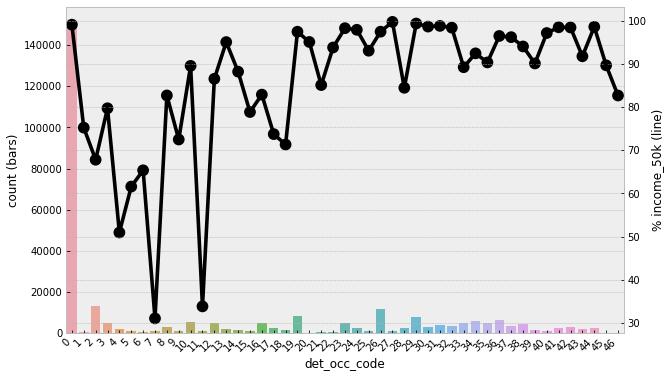

In [50]:
categorical_explanitory_binary_response_chart(df, 'det_occ_code', 'income_50k')

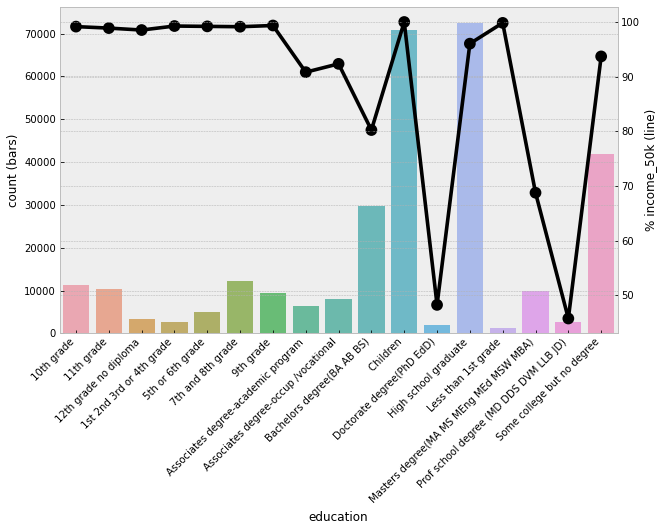

In [51]:
categorical_explanitory_binary_response_chart(df, 'education', 'income_50k')

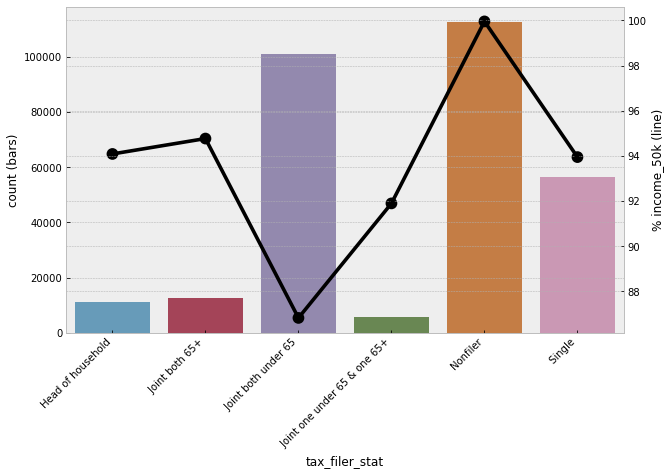

In [52]:
categorical_explanitory_binary_response_chart(df, 'tax_filer_stat', 'income_50k')

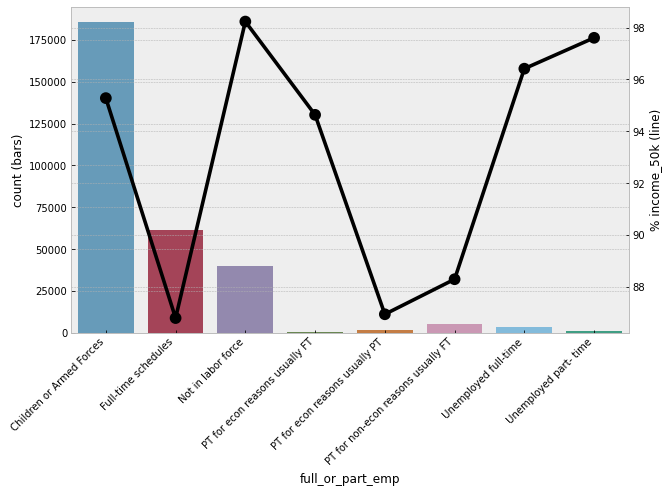

In [53]:
categorical_explanitory_binary_response_chart(df, 'full_or_part_emp', 'income_50k')

<AxesSubplot:>

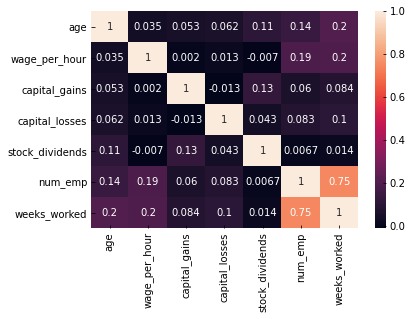

In [61]:
df_cont = df[[*continuous_features]]
sns.heatmap(df_cont.corr(), annot = True)

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaco

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/matplotlib/contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:434: UserWarning: No contour levels were found within the data range.
  cset = contour_func(xx, yy, z, n_levels, **kwargs)
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:125: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2

<Figure size 1440x1440 with 0 Axes>

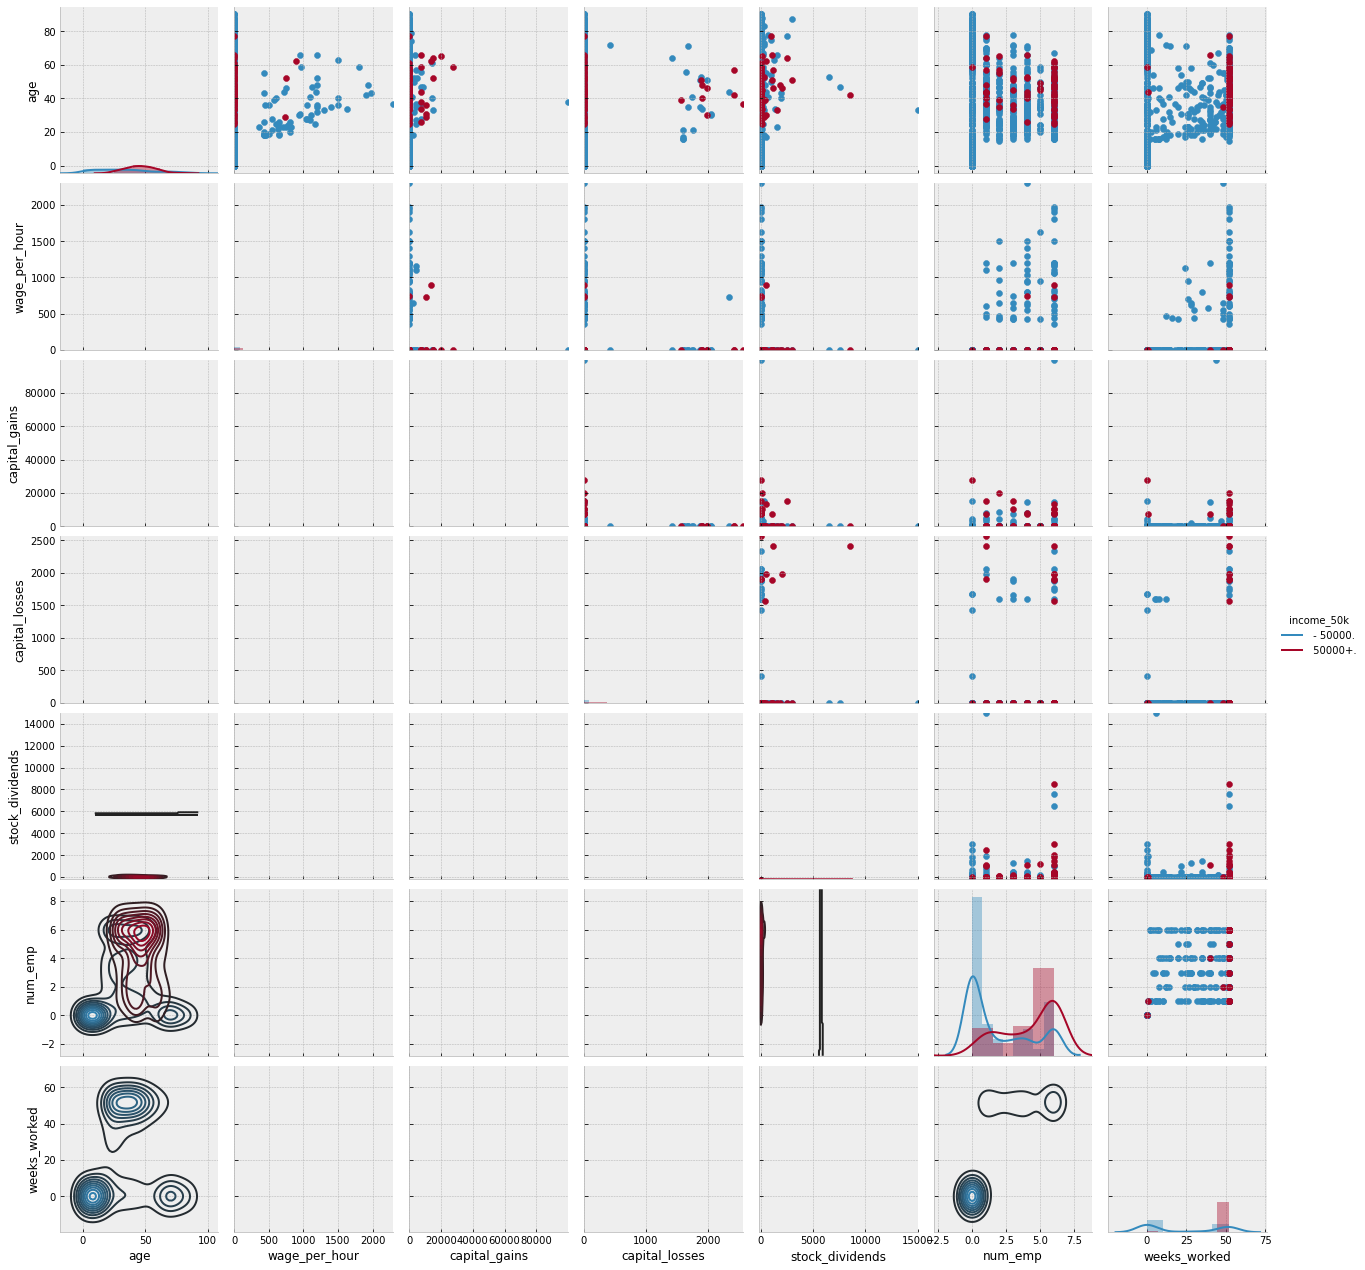

In [48]:
df_sample = df[[*continuous_features, 'income_50k']].sample(n = 1000)

plt.figure(figsize=(20, 20))
g = sns.PairGrid(df_sample, hue='income_50k')
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend();

In [ ]:
continuous_features = [
    'age', 
    'wage_per_hour',
    'capital_gains',
    'capital_losses',
    'stock_dividends',
    'num_emp',
    'weeks_worked',

<AxesSubplot:xlabel='age'>

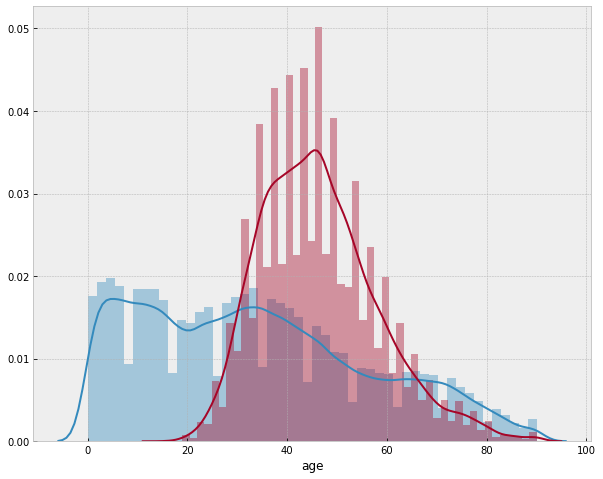

In [56]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['income_50k'] == ' - 50000.']['age'])
sns.distplot(df.loc[df['income_50k'] != ' - 50000.']['age'])

<AxesSubplot:xlabel='num_emp'>

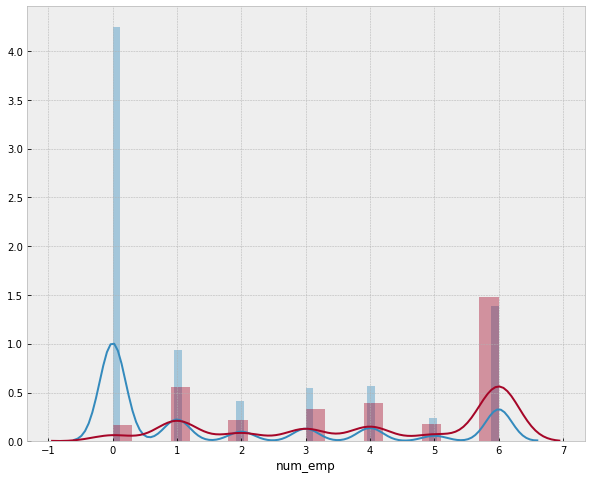

In [58]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['income_50k'] == ' - 50000.']['num_emp'])
sns.distplot(df.loc[df['income_50k'] != ' - 50000.']['num_emp'])

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='weeks_worked'>

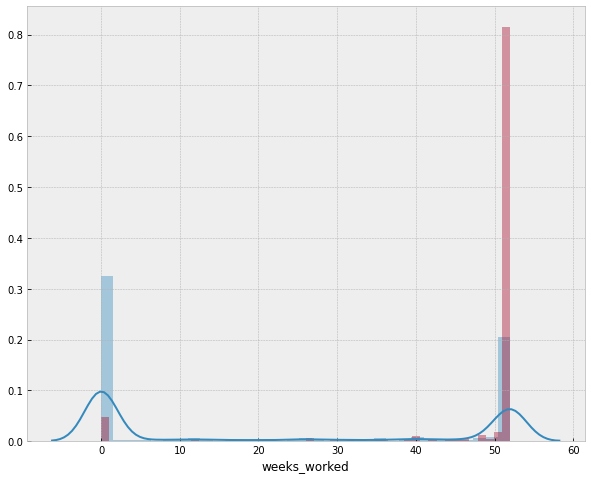

In [59]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['income_50k'] == ' - 50000.']['weeks_worked'])
sns.distplot(df.loc[df['income_50k'] != ' - 50000.']['weeks_worked'])

/opt/anaconda3/envs/msds_rpy37/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='stock_dividends'>

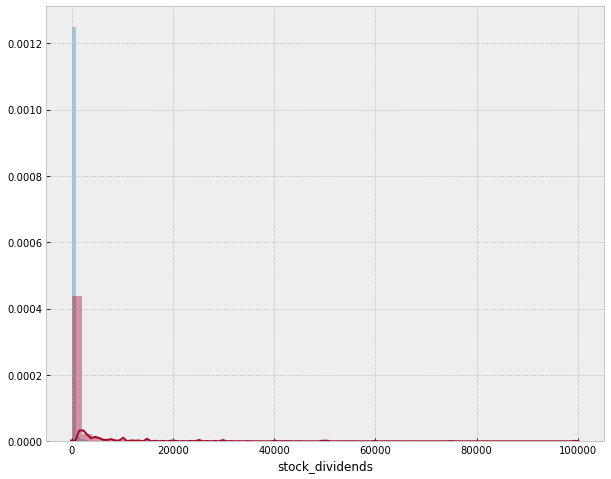

In [62]:
## Overlapping densities
plt.figure(figsize=(10, 8))
sns.distplot(df.loc[df['income_50k'] == ' - 50000.']['stock_dividends'])
sns.distplot(df.loc[df['income_50k'] != ' - 50000.']['stock_dividends'])

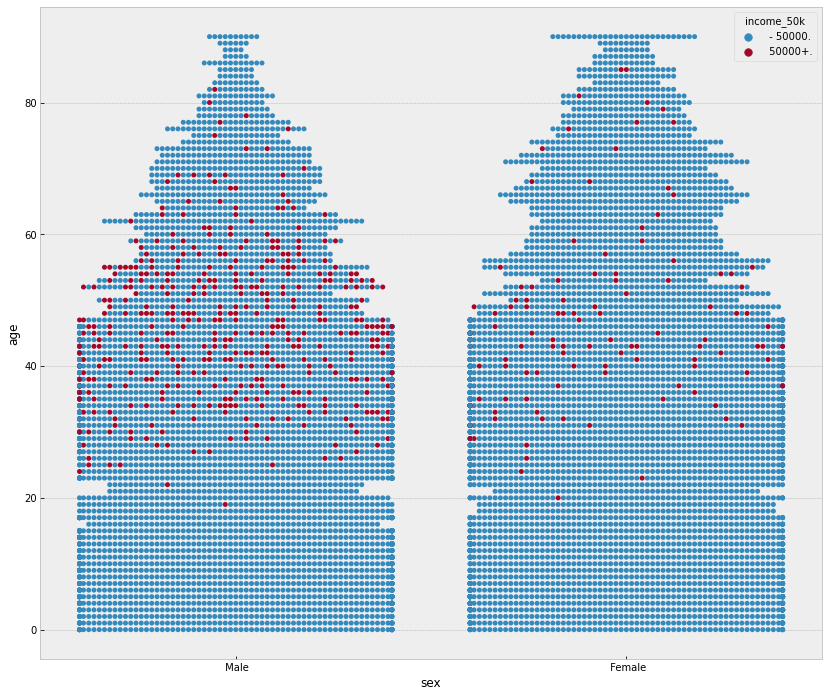

CPU times: user 10.9 s, sys: 128 ms, total: 11.1 s
Wall time: 11.1 s


In [8]:
## swarm plot for looking at sample response across a continuous and binary feature
%%time

df_sample = df.sample(n = 10000) ## the swarm plot can't handle all the data

plt.figure(figsize=(14, 12))
sns.swarmplot(x = 'sex', y = 'age', hue='income_50k', data = df_sample)
#plt.legend(loc='upper-right')
plt.show()